# Linear Programming: Graphical Solutions of LP Problems
---
**Authors:** Le Chau Anh Do, Serif Gören, Debra Soth

**Subject:** Optimisation & Data Analytics by
Prof. Dr. Diana Hristova


This notebook focuses on the graphical method for solving linear programming problems with two decision variables. By visualizing the problem on a two-dimensional graph, this method makes it easier to understand the relationships between constraints and the objective function. Although is limited to smaller problems, the graphical method is a great starting point for learning about optimization techniques and their real-world applications.

## 1. Theoretical Foundations

---

### 1.1 Introduction to Linear Programming

Linear programming, also known as LP, is a mathematical method for optimizing a target variable (e.g profit or cost), which is carried out by taking into account linear equations and inequalities. The goal is to maximize or minimize a function, while the permitted solutions are defined by linear constraints.

Application examples include the optimization of production plans, inventory strategies and resource allocation in logistics (Matthäus and Matthäus, 2014, p.353).

### 1.2 Graphical Solution Method

The graphical solution method is particularly suitable for solving LP problems with two decision variables. This involves visualizing the constraints and the objective function to determine the optimal solution.

The general form of an LP problem consists of three key components:

**Objective function:**

The objective function represents the goal of the problem, which could be either to maximize or minimize a linear function of decision variables. It takes the form:


$z = c_1x_1 + c_2x_2 + \dots + c_nx_n$

where $( x_1, x_2, \dots, x_n )$ are decision variables, and $( c_1, c_2, \dots, c_n)$ are the coefficients representing the contribution of each variable to the objective. In our case only two decision variables are relevant.

**Constraints:**

These are linear inequalities or equations that restrict the values the decision variables can take. A general form of the constraints is:

$\sum_{j=1}^{n} a_{ij} x_j \leq b_i, \quad i = 1, 2, \dots, m$

where $( a_{ij} )$ are coefficients of the decision variables, and $( b_i )$ are constants representing resource limitations.

**Non-negativity Constraints:**

The decision variables cannot take negative values, which is expressed as:
 $x_1 \geq 0$ and $x_2\geq 0$

**Step 1: Defining the feasible region**

First, we have to define the feasible region by plotting the constraint as linear inequalities on a graph. The feasible region is the area where all the constraints overlap. This region represents the set of all possible solutions that satisfy the constraints. Non-negativity conditions, such as $x_1 \geq 0$ and $x_2\geq 0$, restrict solutions to the first quadrant.

![Figure 1: Feasible region defined by constraints, showing all corners (Matthäus and Matthäus, 2014)](https://drive.google.com/uc?id=1uvqiIOs0ZxolsDaMGMOOPzl-Vsjc3HRF)
*Figure 1: Feasible region defined by constraints, showing all corners (Matthäus and Matthäus, 2014)*

**Step 2: Optimizing the objective function**

Once the feasible region is identified, the next step involves plotting the objective function, which represents the goal of optimization, such as maximizing profit or minimizing cost. The objective function $z$ is visualized as a straight line and is moved parallel across the graph to determine the point where it achieves the best possible value within the feasible region (Matthäus and Matthäus, 2014, pp. 354-355).

![Figure 2: Finding the optimal solution within the feasible region by moving the objective function $z$ parallel accross the graph (Matthäus and Matthäus, 2014)](https://drive.google.com/uc?id=1dIIXhnLghS8FQjRZFV0mso2MM00lbj41)

*Figure 2: Finding the optimal solution within the feasible region by moving the objective function $z$ parallel accross the graph (Matthäus and Matthäus, 2014)*

**Step 3: Identifying the Optimal Solution**

The optimal solution is found at one of the corner points of the feasible region. The solution that gives out the maximum or minimum value can be determined by evaluating the objective function at each corner point. (Matthäus and Matthäus, 2014, pp. 356-358).

### 1.3 Possible Solutions:

The solution to an optimization problem can fall into different categories based on the feasibility and boundedness of the feasible region. The following subsections outline the different types of solutions that may arise:


#### 1.3.1 Feasible Solution:

A feasible solution satisfies all the constraints of the linear programming problem, including non-negativity restrictions. The set of all feasible solutions form the feasible region. This region encompasses all possible points that meet the problem's constraints (Ye, 2023, p.21).

#### 1.3.2 Infeasible Solution:
An LP problem is infeasible if no solution exists that satisfies all the constraints at the same time resulting in an empty feasible region. This is visually recognizable by plotting the constraints and seeing the graphs running parallel from each other with no intersection (Ye, 2023, p.21).

#### 1.3.3 Unbounded Solution:

An unbounded solution occurs if the objective function can be increased indefinitely without violating any constraints. In this case, the LP problem lacks an optimal solution because the objecive value can always be improved (Ye, 2023, p.21).

#### 1.3.4 Trivial Solution:

A trivial solution occurs when the feasible region shrinks to a single point, usually at the origin, because of strict constraints. This often means that the constraints are too restrictive or do not align well with the problem's goals. Although a trivial solution is technically correct, it usually doesn't offer useful insights. For instance, in production planning, a trivial solution might suggest producing nothing at all, which is neither practical nor helpful.

#### 1.3.5 Multiple Optimal Solutions:

Multiple optimal solutions happen when different points along a line segment within the feasible region give the same best value for the objective function. This usually occurs when the objective function runs parallel to one of the constraint boundaries in the feasible region. Identifying multiple optimal solutions is important because they can offer different options or practical approaches to solving the problem. The simplex algorithm is useful in detecting these alternative solutions and determining whether a linear programming problem has more than one optimal answer (Winston, 2020, p. 153).

## 2. Code Implementation
---

### 2.1 Code

In [21]:
!pip install pulp

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
from itertools import combinations

# Validates the input for the LP problem
def validate_input(objective, constraints):

    # Ensures that objective has exactly 2 coefficients
    if len(objective) != 2:
        raise ValueError("Objective function must have exactly 2 coefficients (for x1, x2).")

    # Ensures that constraints are not empty
    if not constraints:
        raise ValueError("Constraints list cannot be empty.")

    # Ensures that each constraint has exactly 4 elements
    for constraint in constraints:
        if len(constraint) != 4:
            raise ValueError("Each constraint must have exactly 4 elements: [a1, a2, inequality, b].")

    # Validates each constraint
    for a1, a2, ineq, b in constraints:
        # Ensures inequality is valid
        if ineq not in ("<=", ">="):
            raise ValueError("Inequality must be either '<=' or '>='.")
        # Ensures at least one coefficient is non-zero
        if a1 == 0 and a2 == 0:
            raise ValueError("Both coefficients in a constraint cannot be zero.")


# Prepares a PuLP model from the given objective function and constraints
def prepare_pulp_model(objective, constraints, maximize=True):

    # Creates LP model
    sense = LpMaximize if maximize else LpMinimize
    model = LpProblem("TwoVarLP", sense)

    # Defines decision variables x1 and x2 (non-negative)
    x1 = LpVariable("x1", lowBound=0)
    x2 = LpVariable("x2", lowBound=0)

    # Defines objective function
    model += objective[0] * x1 + objective[1] * x2, "Objective"

    # Adds constraints to model
    for (a1, a2, ineq, b) in constraints:
        if ineq == "<=":
            model += (a1 * x1 + a2 * x2 <= b)
        elif ineq == ">=":
            model += (a1 * x1 + a2 * x2 >= b)

    return model, x1, x2


# Solves the PuLP model and handles different solution statuses
def solve_pulp_model(model):

    # Solves LP problem using the default solver
    result_status = model.solve(PULP_CBC_CMD(msg=0))
    status_str = LpStatus[result_status]

    # Handles different solution statuses
    if status_str == "Infeasible":
        raise ValueError("No feasible solution found. Check your constraints.")
    if status_str == "Unbounded":
        raise ValueError("The problem is unbounded. Ensure you have sufficient constraints.")
    if status_str not in ("Optimal", "Feasible"):
        raise ValueError(f"Unexpected solver status: {status_str}")

    return status_str, model


# Checking for multiple optimal solutions
def check_multiple_optimal_solutions(model, x1, x2, constraints):

    # Gets optimal objective value
    optimal_value = value(model.objective)

    # Stores optimal point
    optimal_point = (x1.varValue, x2.varValue)

    # Generates all possible pairs of constraints to find corner points
    corner_points = []
    for (c1, c2) in combinations(constraints, 2):
        # Solve for the intersection of two lines defined by c1 and c2
        point = solve_intersection(c1, c2)
        if point is not None:
            corner_points.append(point)

    # Filters feasible points (satisfy all constraints)
    feasible_points = []
    for (px, py) in corner_points:
        if all(is_feasible(px, py, cons) for cons in constraints):
            feasible_points.append((px, py))

    # Calculates objective values at all feasible points
    objective_values = {point: objective_value(point, model) for point in feasible_points}

    # Checks if any other feasible point has the same objective value as the optimal point
    alternate_optimal_points = [p for p, val in objective_values.items() if val == optimal_value and p != optimal_point]

    # Result
    if alternate_optimal_points:
        print(f"Multiple optimal solutions detected: {alternate_optimal_points}")
    else:
        print("No multiple optimal solutions detected.")


"""Calculates the intersection point of two linear constraints:
Constraint 1: a1*x1 + a2*x2 = b1
Constraint 2: c1*x1 + c2*x2 = b2
Uses Cramer's rule with the determinant (det) to check if the lines are parallel or coincident
Returns the intersection point (x, y) if det ≠ 0, otherwise None"""

def solve_intersection(c1, c2):
    a1, a2, _, b1 = c1
    c1, c2, _, b2 = c2
    det = a1 * c2 - a2 * c1  # Determinant of the coefficient matrix
    if abs(det) < 1e-9:  # Lines are parallel or coincident
        return None
    # Cramer's rule to solve for x and y
    x = (b1 * c2 - b2 * a2) / det
    y = (a1 * b2 - c1 * b1) / det
    return (x, y)


# Checks if a given point satisfies a constraint
def is_feasible(x, y, constraint):

    a1, a2, ineq, b = constraint
    if ineq == "<=":
        return a1 * x + a2 * y <= b
    elif ineq == ">=":
        return a1 * x + a2 * y >= b
    return False  # Fallback, should not occur if constraints are validated


# Calculates the objective value at a given point
def objective_value(point, model):

    x, y = point
    # Gets decision variables from the model
    var_names = [v.name for v in model.variables()]
    var_values = {var_names[0]: x, var_names[1]: y}

    # Computes objective value
    objective = sum(var_values[var.name] * coeff for var, coeff in model.objective.items())
    return objective



# Plots the constraints, feasible region, and optimal solution
def plot_solution(objective, constraints, optimal_point, optimal_value,
                  plot_feasible_region_only=False, plot_lines_only=False,
                  plot_resolution=400, axis_step=10):

    # Determines bounds for x1 and x2 based on constraints
    x_max, y_max = 0, 0
    for (a1, a2, ineq, b) in constraints:
        a1, a2, b = float(a1), float(a2), float(b)
        if a1 > 0:
            x_candidate = b / a1
            x_max = max(x_max, x_candidate)
        if a2 > 0:
            y_candidate = b / a2
            y_max = max(y_max, y_candidate)

    x_max = np.ceil(x_max / axis_step) * axis_step
    y_max = np.ceil(y_max / axis_step) * axis_step

    x_vals = np.linspace(0, x_max, plot_resolution)

    # Creates plot
    plt.figure(figsize=(10, 6))

    # Defines colors for constraints
    colors = plt.cm.tab10(np.linspace(0, 1, len(constraints)))

    if plot_feasible_region_only:
        # Plots only feasible region
        y_grid, x_grid = np.meshgrid(np.linspace(0, y_max, plot_resolution),
                                     np.linspace(0, x_max, plot_resolution))
        feasible = np.ones_like(x_grid, dtype=bool)
        for (a1, a2, ineq, b) in constraints:
          if ineq == "<=":
              feasible &= (a1 * x_grid + a2 * y_grid <= b)
          elif ineq == ">=":
              feasible &= (a1 * x_grid + a2 * y_grid >= b)


        # Shades feasible region
        plt.contourf(x_grid, y_grid, feasible, levels=[0.5, 1], alpha=0.3, colors=['lightblue'])

        # Plots constraints as lines
        for i, (a1, a2, _, b) in enumerate(constraints):
            label = f"{a1}x1 {'+' if a2 > 0 else '-'} {abs(a2)}x2 {ineq} {b}" if a2 != 0 else f"{a1}x1 {ineq} {b}"
            if abs(a2) > 1e-9:  # Regular constraint: y = (b - a1 * x) / a2
                y_line = (b - a1 * x_vals) / a2
                plt.plot(x_vals, y_line, color=colors[i], linestyle='-', label=label)
            else:
                # Vertical line: x = b / a1
                x_line = b / a1
                plt.axvline(x_line, color=colors[i], linestyle='-', label=label)

        # Plots objective function line
        if abs(objective[1]) > 1e-9:  # Regular case where objective[1] != 0
            y_obj = (optimal_value - objective[0] * x_vals) / objective[1]
            plt.plot(x_vals, y_obj, 'g--', label="Objective Function")
        else:
            x_obj = optimal_value / objective[0]
            plt.axvline(x_obj, color='g', linestyle='--', label="Objective Function")

        # Highlights optimal solution
        plt.plot(optimal_point[0], optimal_point[1], 'ro', label="Optimal Solution")
        plt.annotate(f"({optimal_point[0]:.2f}, {optimal_point[1]:.2f})",
                     (optimal_point[0], optimal_point[1]),
                     textcoords="offset points", xytext=(10, -10), ha='center')

    else:
    # Plots constraints with shaded areas or just lines
      for i, (a1, a2, ineq, b) in enumerate(constraints):
          label = f"{a1}x1 {'+' if a2 > 0 else '-'} {abs(a2)}x2 {ineq} {b}" if a2 != 0 else f"{a1}x1 {ineq} {b}"
          if abs(a2) > 1e-9:  # Regular constraint: y = (b - a1 * x) / a2
              y_line = (b - a1 * x_vals) / a2
              if plot_lines_only:
                  plt.plot(x_vals, y_line, color=colors[i], linestyle='-', label=label)
              elif ineq == "<=":  # Shade below the line
                  plt.fill_between(x_vals, 0, y_line, alpha=0.2, color=colors[i], label=label)
              elif ineq == ">=":  # Shade above the line
                  plt.fill_between(x_vals, y_line, y_max, alpha=0.2, color=colors[i], label=label)
              else:
                  print(f"Unexpected inequality '{ineq}' for constraint {a1}x1 + {a2}x2 {ineq} {b}")

          else:  # Vertical line: a2 is approximately 0
              x_line = b / a1
              if plot_lines_only:
                  plt.axvline(x_line, color=colors[i], linestyle='-', label=label)
              elif ineq == "<=":  # Shade left of the line
                  plt.axvspan(0, x_line, alpha=0.2, color=colors[i], label=label)
              elif ineq == ">=":  # Shade right of the line
                  plt.axvspan(x_line, x_max, alpha=0.2, color=colors[i], label=label)
              else:
                  print(f"Unexpected inequality '{ineq}' for constraint {a1}x1 + {a2}x2 {ineq} {b}")



    # Plot settings
    plt.xlim(0, max(1, x_max))
    plt.ylim(0, max(1, y_max))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Feasible Region with Objective and Solution" if plot_feasible_region_only else "Constraints with Shaded Areas")
    plt.legend()
    plt.grid(True)
    plt.show()



# Main function for solving and visualizing the LP problem
def graphical_lp_solution_pulp(objective, constraints, maximize=True,
                               plot_resolution=400, axis_step=10):

    try:
        # Step 1: Validate input (Ensure all inputs conform to LP requirements)
        validate_input(objective, constraints)

        #Step 2: Build the LP model and normalize constraints
        model, x1, x2 = prepare_pulp_model(objective, constraints, maximize)

        # Step 3: Solve the LP problem (Find the optimal solution using PuLP solver)
        status_str, solved_model = solve_pulp_model(model)

        # Step 4: Check for multiple optimal solutions (Identify if multiple solutions exist)
        check_multiple_optimal_solutions(model, x1, x2, constraints)


        # Step 5: Extract optimal solution (Retrieve values for x1, x2 and objective function)
        opt_x1 = x1.varValue
        opt_x2 = x2.varValue
        optimal_val = value(solved_model.objective)

        # Step 6: Plot the solution (Visualize feasible region and optimal solution)

        # Plot constraints with shaded areas
        plot_solution(objective, constraints, (opt_x1, opt_x2), optimal_val,
                      plot_feasible_region_only=False, plot_lines_only=False,
                      plot_resolution=plot_resolution, axis_step=axis_step)

        # Plot only the feasible region with constraints as lines
        plot_solution(objective, constraints, (opt_x1, opt_x2), optimal_val,
                      plot_feasible_region_only=True, plot_lines_only=True,
                      plot_resolution=plot_resolution, axis_step=axis_step)

        # Results
        return {"Optimal Point": (opt_x1, opt_x2), "Optimal Value": optimal_val, "Solver Status": status_str}

    except ValueError as e:
        print(f"Input Error: {e}")
        return None
    except Exception as e:
        print(f"Unexpected Error: {e}")
        return None

### 2.2 Test Cases

In this section, we evaluate the functionality of the `graphical_lp_solution_pulp` function by applying it to different types of linear programming problems. Each test case includes a specific objective function and a set of constraints to examine how the function handles various solution mentioned in chapter [1.3 Possible Solutions](###13-possible-solutions).

#### 2.2.1 Standard Case

**Objective function:**
<br>
$Z = 3000x_{1} + 2000x_{2}$

**Constraints:**

- $5x_{1} +2x_{2} \le 180$
- $3x_{1} +3x_{2} \le 135$
- $x_{1}, x_{2} \geq 0$

Standard Case:
No multiple optimal solutions detected.


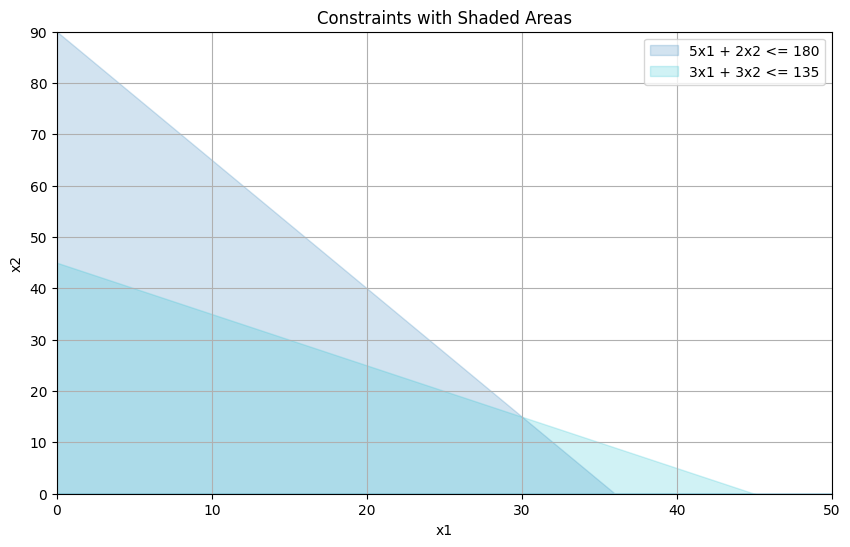

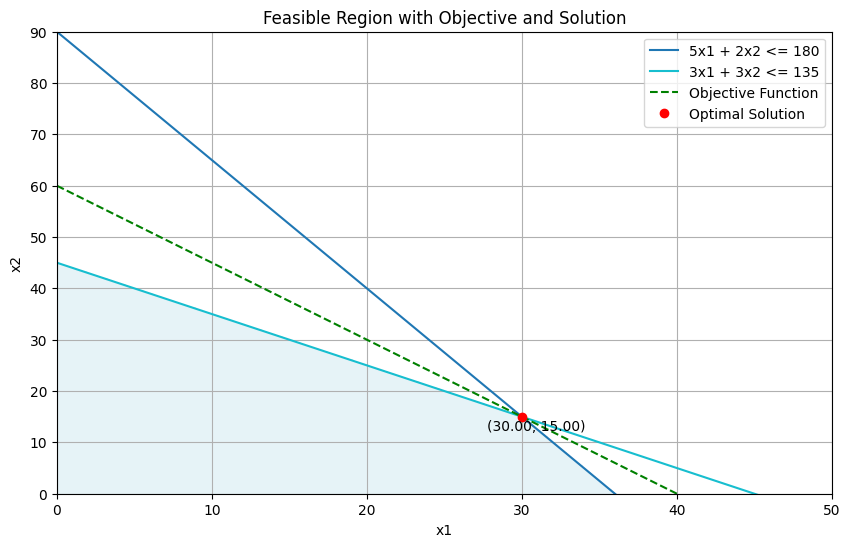

{'Optimal Point': (30.0, 15.0), 'Optimal Value': 120000.0, 'Solver Status': 'Optimal'}


In [23]:
# 1. Standard Case
objective_standard = [3000, 2000]
constraints_standard = [
    [5, 2, "<=", 180],
    [3, 3, "<=", 135]
]
print("Standard Case:")
print(graphical_lp_solution_pulp(objective_standard, constraints_standard, maximize=True))

**Solution:**
- Optimal Point: $(30|15)$  
- Optimal Value: $120000$  
- Solver Status: 'Optimal'  

**Interpretation:**

This is a standard case with a unique optimal solution.

In the first plot you can see the two constraints: $5x_{1} +2x_{2} \le 180$ and $3x_{1} +3x_{2} \le 135$. The shaded areas represent the regions that satisfy each constraint, and the overlap between them marks the feasible region where both conditions are met.

In the second plot only the feasible region is shaded in. The two constraints are plotted as two individual lines. The objective function is shown as a dashed green line, and the optimal solution is marked with a red dot at the point $(30|15)$ which means that the best possible values for the decision variables are $x_{1} = 30.0$ and $x_{2} = 15.0$ with an optimal value of $120000$.

#### 2.2.2 Trivial Case

**Objective function:**

$Z = x_{1} + x_{2}$

**Constraints:**
- $x_{1} \leq 0$  
- $x_{2} \leq 0$  
- $x_{1}, x_{2} \geq 0$

Trivial Case:
No multiple optimal solutions detected.


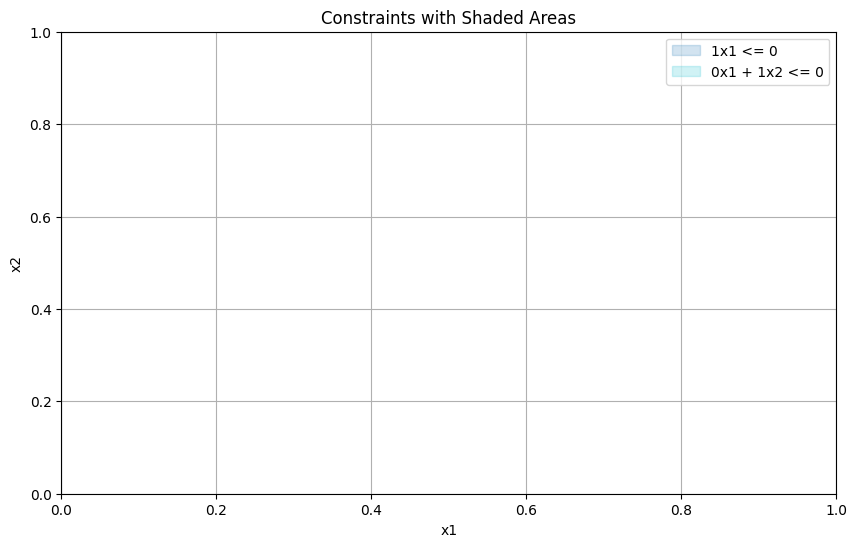

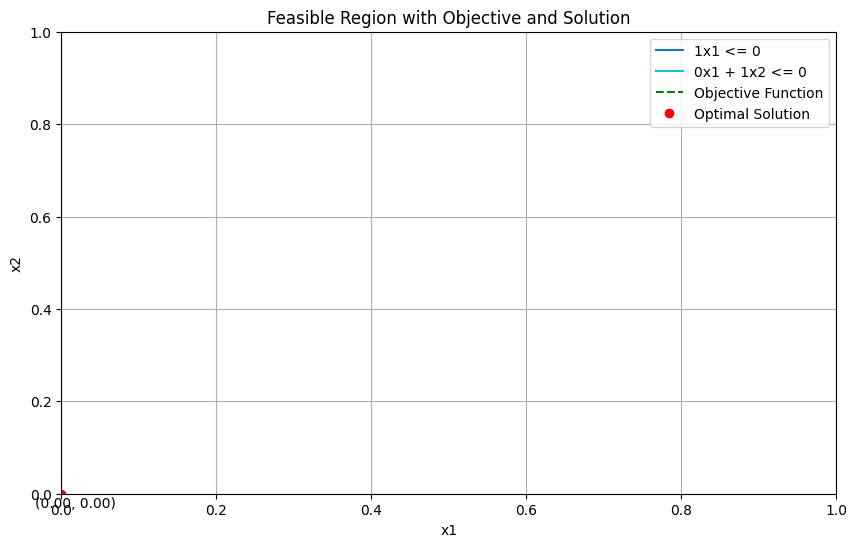

{'Optimal Point': (0.0, 0.0), 'Optimal Value': 0.0, 'Solver Status': 'Optimal'}


In [24]:
# 4. Trivial Case
objective_trivial = [1, 1]
constraints_trivial = [
    [1, 0, "<=", 0],
    [0, 1, "<=", 0]
]
print("Trivial Case:")
print(graphical_lp_solution_pulp(objective_trivial, constraints_trivial, maximize=True))

**Solution:**  
  - Optimal Point: $(0|0)$  
  - Optimal Value: $0$  
  - Solver Status: 'Optimal'  

**Interpretation:**  
This visualization represent a trivial case of a linear programming problem.

In the first plot the two constraints $x_{1} \leq 0$ and $x_{2} \leq 0$ limit both decision variables $x_{1}$ and $x_{2}$ to non-positive values, meaning the only feasible solution is at the origin $(0|0)$. The shaded region that represents the set of values that satisfy both constraints is reduced to a single point located at the bottom-left corner of the graph.

The second plot shows the optimal solution as a red dot at the origin.

#### 2.2.3 Multiple Optimal Solutions

**Objective function:**

$Z = x_{1} + x_{2}$

**Constraints:**
  - $x_{1} + x_{2} = 5$  
  - $x_{1}, x_{2} \geq 0$  

  (as inequalities: $x_{1} + x_{2} \leq 5$ and $x_{1} + x_{2} \geq 5$)  

Multiple Optimal Solutions Case:
Multiple optimal solutions detected: [(-0.0, 5.0)]


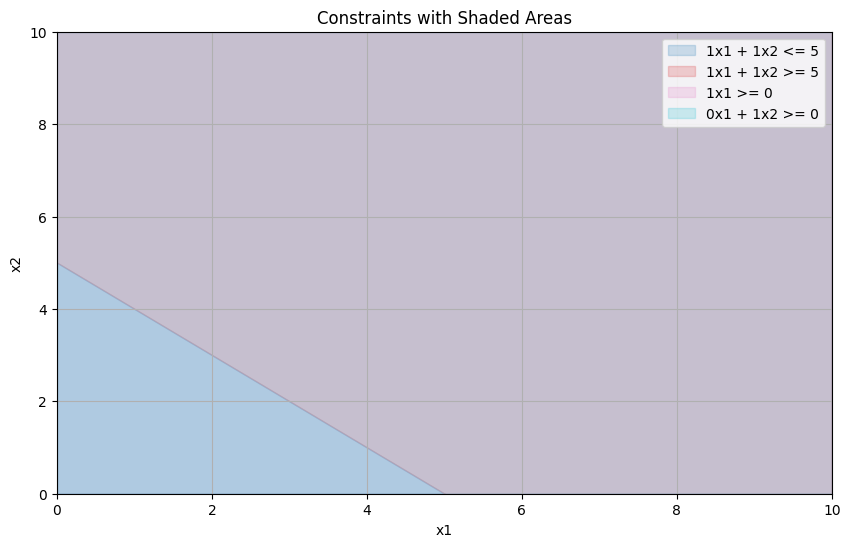

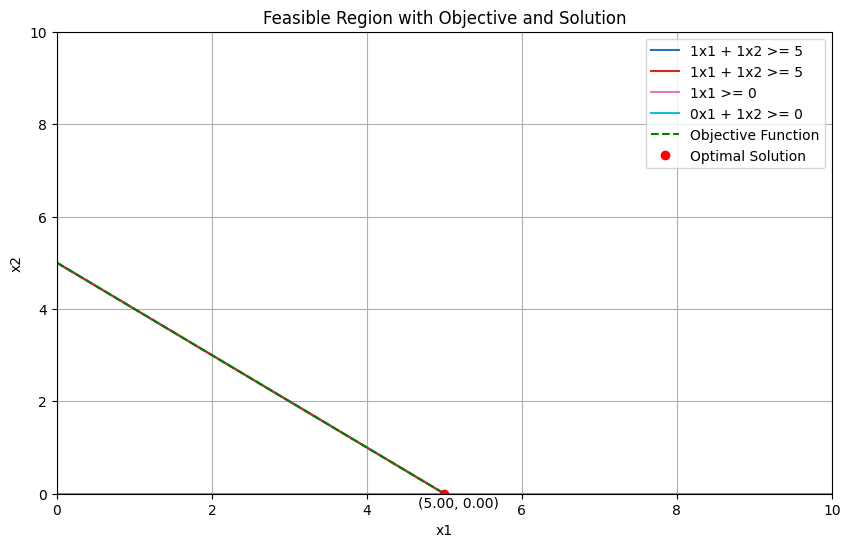

{'Optimal Point': (5.0, 0.0), 'Optimal Value': 5.0, 'Solver Status': 'Optimal'}


In [25]:
# 5. Multiple Optimal Solutions
objective_multiple = [1, 1]
constraints_multiple = [
    [1, 1, "<=", 5],
    [1, 1, ">=", 5],
    [1, 0, ">=", 0],
    [0, 1, ">=", 0]
]
print("Multiple Optimal Solutions Case:")
print(graphical_lp_solution_pulp(objective_multiple, constraints_multiple, maximize=True))

**Solution:**
  - Optimal Point: $(5|0)$  
  - Optimal Value: $5$  
  - Solver Status: 'Optimal'  

**Interpretation:**

This is an LP with multiple optimal solutions.

The first plot shows the feasible region defined by the given constraint. Since the constraints $x_{1} + x_{2} \leq 5$ and $x_{1} + x_{2} \geq 5$ force the solution to lie on the line $x_{1} + x_{2} = 5$, the feasible region is also reduced to a single line rather than a whole area.

In the second plot the feasible region lies entirely on the line $x_{1} + x_{2} = 5$ and the objective function overlaps with this boundary. This indicates that multiple points along the line result in the same optimal value. The red dot at $(5|0)$ highlights one of these optimal solutions, however, any other point on the line would offer the same result.


### 2.3 Error Handling

Our method includes two essential functions that address infeasbility and unboundedness

The function `solve_pulp_model(model)` is responsible for solving the LP problem and handling different solution outcomes. It uses the PuLP solver to determine the optimal solution. The function interprets the solver's status codes and categorizes the solution as either 'Optimal', 'Infeasible', 'Unbounded', or 'Undefined'. If the problem is infeasible or unbounded, the function raises exceptions with specific messages that guide users to review their constraints.

The second function, `check_multiple_optimal_solutions(model, x1, x2, constraints)` examines whether the LP problem exhibits multiple optimal solutions by analyzing the objective values at all feasible corner points.

Below we can see the test of how the code can handle possible errors.

#### 2.3.2 Infeasible Case

**Objective function:**
<br>
$Z = x_{1} + x_{2}$

**Constraints:**  
- $x_{1} + x_{2} \leq 5$  
- $x_{1} + x_{2} \leq 10$
- $x_{1}, x_{2} \geq 0$

In [26]:
# 2. infeasible Case
objective_infeasible = [1, 1]
constraints_infeasible = [
    [1, 1, "<=", 5],
    [1, 1, ">=", 10]
]
print("Infeasible Case:")
print(graphical_lp_solution_pulp(objective_infeasible, constraints_infeasible, maximize=True))

Infeasible Case:
Input Error: No feasible solution found. Check your constraints.
None


**Solution:**  

Error: No feasible solution found. Check your constraints.  

**Interpretation:**

The constraints contradict each other because they do not share a common region. Therefore, there is no feasible solution.

#### 2.3.3 Unbounded Case

**Objective function:**  
$Z = x_{1} - x_{2}$

**Constraints:**
- $x_{1} - 2x_{2} \leq 5$  
- $x_{1}, x_{2} \geq 0$  

In [27]:
# 3. Unbounded Case
objective_unbounded = [1, -1]
constraints_unbounded = [
    [1, -2, ">=", 5]
]
print("Unbounded Case:")
print(graphical_lp_solution_pulp(objective_unbounded, constraints_unbounded, maximize=True))

Unbounded Case:
Input Error: The problem is unbounded. Ensure you have sufficient constraints.
None


**Solution:**  

Error: The problem is unbounded. Ensure you have sufficient constraints.  

**Interpretation:**  

Since there is no upper bound for the objective function, $Z$ grows infinitely. This shows that the problem is unbounded.

## 3. Real-World Application
---

### 3.1 Real-World Data

In the following subsection, we want to test our code with real data. We have selected and tested an LP under the following link:

https://huggingface.co/datasets/CardinalOperations/IndustryOR/blob/main/IndustryOR.json

**Dataset:** IndustryOR Nr.:9

**Optimum:** 9800.00

**Problem:**

A furniture factory needs to determine how many tables, chairs, and bookshelves to produce in order to maximize profit. The factory can sell tables for 200 Dollar each, chairs for 50 Dollar each, and bookshelves for 150 Dollar each. The manufacturing costs for each table, chair, and bookshelf are 120 Dollar, 20 Dollar, and 90 Dollar, respectively. Profit is the difference between the selling price and the manufacturing cost. Tables, chairs, and bookshelves each occupy 5, 2, and 3 square meters of warehouse space, respectively. Due to limited warehouse space, the total space cannot exceed 500 square meters. Additionally, due to market demand, the factory needs to produce at least 10 tables and 20 bookshelves. Finally, the total number of items produced by the furniture factory cannot exceed 200.

**Explanation:**

The furniture factory can sell tables for 200 Dollar and has incurred costs of 120 Dollar, sell chairs for 50 Dollar and costs of 20 Dollar and sell bookshelves for 150 Dollar and costs of 90 Dollar.

**Objective Function:**

Maximize the profit:

$Z = (200 - 120)x₁ + (50 - 20)x₂ + (150 - 90)x₃$

Simplified:

$Z = 80x₁ + 30x₂ + 60x₃$

**Variables:**

- $x₁:$ Number of tables produced
- $x₂:$ Number of chairs produced
- $x₃:$ Number of bookshelves produced

**Constraints:**
1. Space Constraint:
   $5x₁ + 2x₂ + 3x₃ ≤ 500$
2. Minimum Production (Market Demand):
   $x₁ ≥ 10, x₃ ≥ 20$
3. Maximum Total Production:
   $x₁ + x₂ + x₃ ≤ 200$
4. Non-Negativity:
   $x₁, x₂, x₃ ≥ 0$

Since the profit for chairs is the lowest and they only require 2 square meters for storage space, we remove this variable to adapt the example to our code. Excluding chairs simplifies our problem without significantly affecting the output. Tables and bookshelves have higher impact on the profit and are therefore more critical for optimization.

**Adjusted Objective Function:**

After removing $x₂$:

$Z = 80x₁ + 60x₃$

**Adjusted Constraints:**
1. Space Constraint (with $x₂ = 0$):
   $5x₁ + 3x₃ ≤ 500$
2. Minimum Production:
   $x₁ ≥ 10, x₃ ≥ 20$
3. Maximum Total Production (with $x₂ = 0$):
   $x₁ + x₃ ≤ 200$
4. Non-Negativity:
   $x₁, x₃ ≥ 0$


### 3.2 Visualisations

Reduced Problem:
No multiple optimal solutions detected.


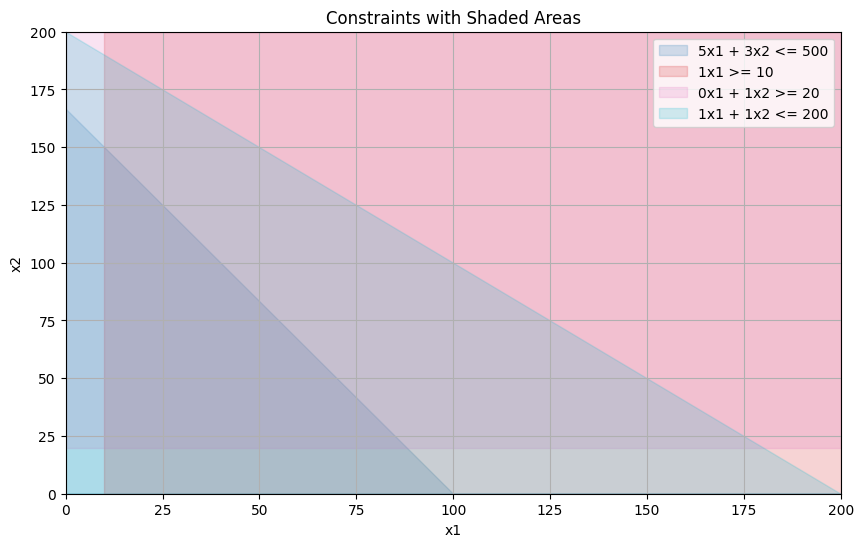

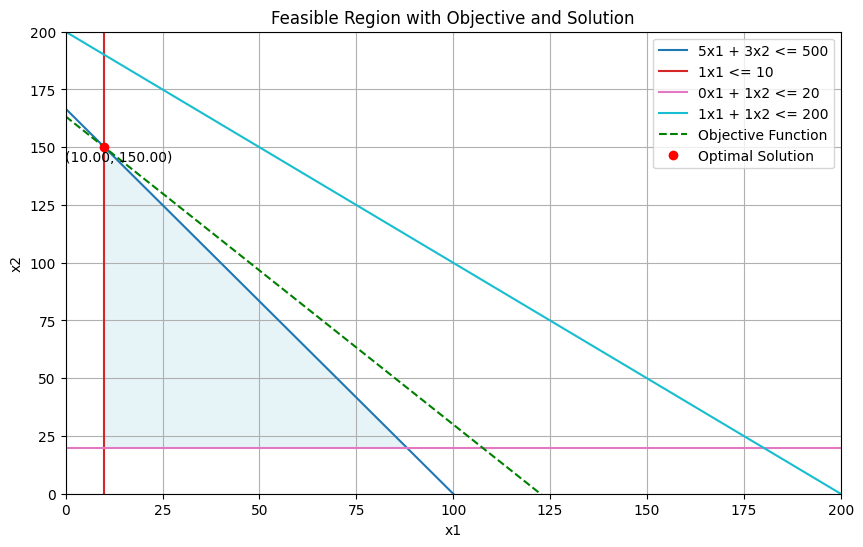

{'Optimal Point': (10.0, 150.0), 'Optimal Value': 9800.0, 'Solver Status': 'Optimal'}


In [28]:
# Objective function coefficients (profit per unit of tables and bookshelves)
objective_realworld = [80, 60]

# Constraints: [coefficients for x1 and x3, operator, RHS]
constraints_realworld = [
    [5, 3, "<=", 500],  # Space constraint
    [1, 0, ">=", 10],   # Minimum tables
    [0, 1, ">=", 20],   # Minimum bookshelves
    [1, 1, "<=", 200]   # Maximum total production
]

print("Reduced Problem:")
print(graphical_lp_solution_pulp(objective_realworld, constraints_realworld, maximize=True))


### 3.3 Result

We have found an optimal solution. The problem is therefore solvable and the calculated solution is the best within the feasable region.

Our optimum point with 9800.0 is the same as the one stored in the data set. This shows us that we have worked correctly and that the code is working properly. We therefore have a maximum profit at 9800 Dollar. The optimum point is at (10.0, 150.0), which means that the optimum production quantity is 10 tables and 150 bookshelves.

The optimum point shows that the production capacities and the available space are used efficiently. The result confirms that the removal of chairs has no significant negative effect on the result. Profits are maximized through the production of tables and bookshelves.

## 4. Conclusion
---

To sum up, the graphical method is a simple yet effective way to solve Linear Programming (LP) problems. It provides a clear and intuitive understanding of optimization by visually representing constraints, objective functions, and feasible regions. This approach makes it easier to understand key concepts, such as how corner points determine the best solution. However, it does have its limitations for example when dealing with more variables or complex problems, drawing everything by hand becomes impractical.

This project takes the traditional graphical method a step further by using Python to automate calculations, check for valid inputs, and leverage the PuLP solver to identify cases where solutions might not exist or grow infinitely. Adding visualizations makes it easier to understand the solutions and helps spot special cases like multiple optimal solutions, infeasibility or unboundedness. These improvements turn the graphical method into a practical way to tackle small-scale problems in fields like production planning, investment analysis, and logistics.

## 5. References
---

AMPL, n.d. Plot feasible region. [online] Available at:
https://ampl.com/colab/notebooks/plot-feasible-region.html
(Accessed 23 January 2025).

<br>

CodeMax, n.d. How to Visualize Feasible Region for Linear Programming. [online] Available at: https://codemax.app/snippet/how-to-visualize-feasible-region-for-linear-programming-with-arbitrary-inequalities-in-numpy-matplotlib-in-python/ (Accessed 23 January 2025).

<br>

GeeksforGeeks, 2018. Python | Linear Programming in PuLP. [online] Available at: https://www.geeksforgeeks.org/python-linear-programming-in-pulp/ (Accessed 23 January 2025).

<br>

Keen, B.A., 2016. Linear Programming with Python and PuLP – Part 1. [online] Available at: https://benalexkeen.com/linear-programming-with-python-and-pulp/ (Accessed 23 January 2025).

<br>

Keen, B.A., 2016. Linear Programming with Python and PuLP – Part 2. [online] Available at: https://benalexkeen.com/linear-programming-with-python-and-pulp-part-2/ (Accessed 23 January 2025).

<br>

Keen, B.A., 2016. Linear Programming with Python and PuLP – Part 3. [online] Available at: https://benalexkeen.com/linear-programming-with-python-and-pulp-part-3/ (Accessed 23 January 2025).

<br>

Matthäus, H. and Matthäus, W.-G., 2014. Mathematik für BWL-Bachelor: Schritt für Schritt mit ausführlichen Lösungen. 4th edn. Wiesbaden: Springer Gabler.

<br>

Navlani, A., 2022. Solving Linear Programming using Python PuLP. [online] Available at: https://machinelearninggeek.com/solving-linear-programming-using-python-pulp/ (Accessed 23 January 2025).

<br>

Python-Kurs.eu, n.d. Einführung in Matplotlib. [online] Available at: https://www.python-kurs.eu/matplotlib.php (Accessed 23 January 2025).

<br>

Python-Kurs.eu, n.d. Einführung in NumPy. [online] Available at: https://www.python-kurs.eu/numpy.php (Accessed 23 January 2025).

<br>

Winston, W.L., 2020. Operations Research: Applications and Algorithms (5th ed.). [online] Available at: https://www.academia.edu/download/43587201/Winston.OperationsResearch.pdf (Accessed 23 January 2025).

<br>

Ye, Y., 2023. Feasible Regions, Feasible and Improving Directions, and Optimality Test for LP. MS&E211 Lecture Notes, Stanford University. [online] Available at: https://web.stanford.edu/class/msande211x/Lecture042023.pdf (Accessed 20 January 2025).

During the implementation of the code, AI tools were used to correct errors in the code and to support the implementation.